In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# I. 실습용 데이터

In [ ]:
DF = pd.read_csv('https://raw.githubusercontent.com/rusita-ai/pyData/master/product.csv')

In [ ]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15009 entries, 0 to 15008
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           15009 non-null  object 
 1   meanPriceEach  15009 non-null  float64
 2   totalOrder     15009 non-null  float64
 3   orderType_1    15009 non-null  float64
 4   orderType_2    15009 non-null  float64
 5   orderType_3    15009 non-null  float64
 6   totalBundle    15009 non-null  float64
 7   bundleType_1   15009 non-null  float64
 8   bundleType_2   15009 non-null  float64
 9   customerType   15009 non-null  object 
 10  FY             15009 non-null  int64  
 11  Country        15009 non-null  int64  
dtypes: float64(8), int64(2), object(2)
memory usage: 1.4+ MB


In [ ]:
DF.head()

,Date,meanPriceEach,totalOrder,orderType_1,orderType_2,orderType_3,totalBundle,bundleType_1,bundleType_2,customerType,FY,Country
0,2015-01-04,1.56,58065.35,10049.66,25228.37,3672.89,19114.43,17280.89,1833.54,Online,2015,25
1,2015-01-04,1.10,2578275.12,575245.44,1311502.53,181058.65,510468.50,429166.89,80986.81,Offline,2015,25
2,2015-01-11,1.17,2335986.11,560119.16,1032606.49,191515.19,551745.27,465764.93,85966.27,Offline,2015,25
3,2015-01-11,1.52,65483.08,14570.74,30445.75,3170.11,17296.48,16715.45,581.03,Online,2015,25
4,2015-01-18,1.65,52559.10,11415.28,25306.56,3345.08,12492.18,10971.43,1520.75,Online,2015,25


# II. Data Preprocessing

> ## 1) Data Set

In [ ]:
X = DF[['meanPriceEach', 'totalOrder', 'totalBundle', 'orderType_1',
        'orderType_2', 'orderType_3', 'bundleType_1', 'bundleType_2',
        'FY', 'Country']]
y= DF['customerType']

> ## 2) Train & Test Data Split

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,
                                                    random_state = 2045)

print('Train Data : ', X_train.shape, y_train.shape)
print('Test Data : ', X_test.shape, y_test.shape)

Train Data :  (10506, 10) (10506,)
Test Data :  (4503, 10) (4503,)


# III. Random Forest Modeling

> ## 1) Trian Data로 Model 생성

In [ ]:
from sklearn.ensemble import RandomForestClassifier

Model_rf = RandomForestClassifier(n_estimators = 10,
                                  max_features = 2,
                                  random_state = 2045,
                                  n_jobs = -1)
Model_rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=2,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
                       oob_score=False, random_state=2045, verbose=0,
                       warm_start=False)

> ## 2) Feature Importace

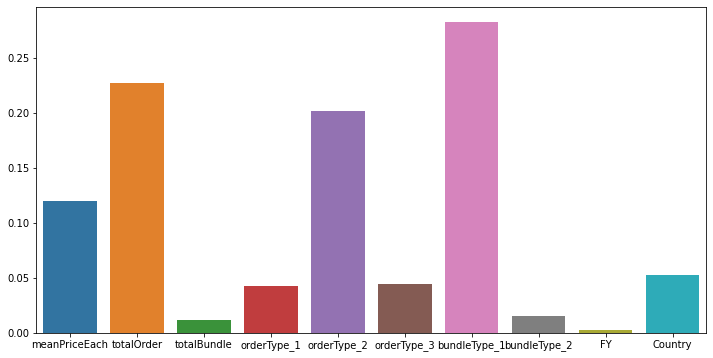

In [ ]:
plt.figure(figsize = (12, 6))
sns.barplot(['meanPriceEach', 'totalOrder', 'totalBundle', 'orderType_1',
            'orderType_2', 'orderType_3', 'bundleType_1', 'bundleType_2',
            'FY', 'Country'],
            Model_rf.feature_importances_)
plt.show()

> ## 3) Test_Data에 Model 적용

In [ ]:
y_hat = Model_rf.predict(X_test)

> ## 4) Model Evaluate

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

Accuracy_rf = accuracy_score(y_test, y_hat)
print(confusion_matrix(y_test, y_hat))
print(Accuracy_rf)

[[2219    8]
 [  29 2247]]
0.9917832556073729


> ## 5) Hyperparameter Tunning

In [ ]:
params = {'n_estimators' : [100, 300, 500, 700],
          'max_features' : [1, 2, 3, 4, 5],
          'max_depth' : [1, 2, 3, 4, 5],
          'random_state' : [2045]}

In [ ]:
from sklearn.model_selection import GridSearchCV, KFold

grid_cv = GridSearchCV(Model_rf,
                       param_grid = params,
                       cv = KFold(n_splits = 5,
                                  random_state = 2045),
                       refit = True,
                       n_jobs = -1)

In [ ]:
from datetime import datetime

start_time = datetime.now()

grid_cv.fit(X_train, y_train)

end_time = datetime.now()
print('Elapsed Time : ', end_time - start_time)

Elapsed Time :  0:19:21.808766


> ## 6) 최적 Hyperparameter 확인(Best Accuracy, Hyperparameter)

In [ ]:
grid_cv.best_score_

0.9868642588301253

In [ ]:
grid_cv.best_params_

{'max_depth': 5, 'max_features': 5, 'n_estimators': 300, 'random_state': 2045}

> ## 7) 최적 모델 생성 및 평가

In [ ]:
Model_CV = grid_cv.best_estimator_

In [ ]:
y_hat = Model_CV.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

print(confusion_matrix(y_test, y_hat))

[[2215   12]
 [  73 2203]]


In [ ]:
Accuracy_cv = accuracy_score(y_test, y_hat)
print(Accuracy_cv)

0.9811236953142349


# IV. Logistic Regression 

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_Scaled = scaler.fit_transform(X)

X_Scaled[:5]

array([[ 0.43582603, -0.22964786, -0.22178346, -0.22387636, -0.22507897,
        -0.18414441, -0.21824719, -0.21676545, -1.12288341, -0.09591983],
       [-0.70554784,  0.50415875,  0.30108507,  0.22273888,  0.82426595,
         1.36565753,  0.35346523,  0.13919172, -1.12288341, -0.09591983],
       [-0.53186052,  0.43361174,  0.34500924,  0.21078616,  0.59674203,
         1.45701529,  0.40426461,  0.16158466, -1.12288341, -0.09591983],
       [ 0.33657613, -0.22748805, -0.22371801, -0.22030383, -0.22082262,
        -0.18853715, -0.21903204, -0.22239806, -1.12288341, -0.09591983],
       [ 0.65913831, -0.23125111, -0.22883045, -0.22279726, -0.22501518,
        -0.18700845, -0.22700494, -0.21817208, -1.12288341, -0.09591983]])

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_Scaled, y,
                                                    test_size = 0.3,
                                                    random_state = 2045)

print('Train Data : ', X_train.shape, y_train.shape)
print('Test Data : ', X_test.shape, y_test.shape)

Train Data :  (10506, 10) (10506,)
Test Data :  (4503, 10) (4503,)


In [ ]:
from sklearn.linear_model import LogisticRegression

Model_lr = LogisticRegression()
Model_lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_hat = Model_lr.predict(X_test)

In [ ]:
confusion_matrix(y_test, y_hat)

array([[1970,  257],
       [ 151, 2125]])

In [ ]:
Accuracy_lr = accuracy_score(y_test, y_hat)

# V. Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

Model_dt = DecisionTreeClassifier(random_state = 2045)
Model_dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=2045, splitter='best')

In [ ]:
y_hat = Model_dt.predict(X_test)

In [ ]:
confusion_matrix(y_test, y_hat)

array([[2203,   24],
       [  36, 2240]])

In [ ]:
Accuracy_dt = accuracy_score(y_test, y_hat)

# VI. 최종 비교

In [ ]:
print('Logistic Regression : ', Accuracy_lr)
print('Decision Tree : ', Accuracy_dt)
print('Random Forest : ', Accuracy_rf)
print('GridSearchCV : ', Accuracy_cv)

Logistic Regression :  0.9093937375083277
Decision Tree :  0.9866755496335776
Random Forest :  0.9917832556073729
GridSearchCV :  0.9811236953142349
